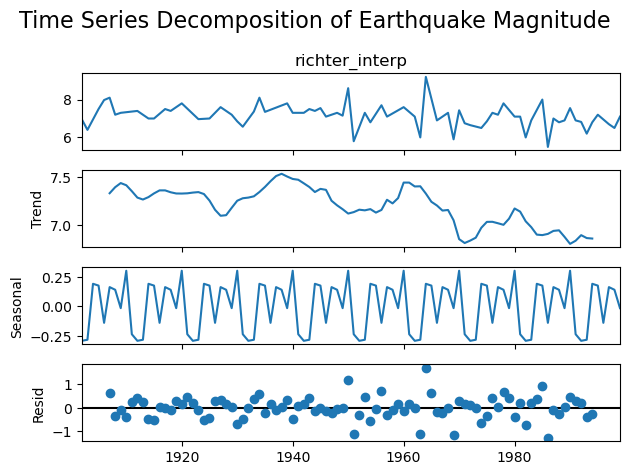

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Load and prepare the data (as before)
df = pd.read_csv('earthquakes.csv')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

annual_data = df.groupby('year').agg({'richter': 'mean'}).reset_index()
annual_data.set_index('year', inplace=True)

# Fill missing years
full_index = pd.RangeIndex(start=annual_data.index.min(), stop=annual_data.index.max() + 1)
annual_data = annual_data.reindex(full_index)

# Interpolate missing values
annual_data['richter_interp'] = annual_data['richter'].interpolate(method='linear')

# Decompose the time series
decomposition = seasonal_decompose(annual_data['richter_interp'], model='additive', period=10)

# Plot the decomposition
decomposition.plot()
plt.suptitle('Time Series Decomposition of Earthquake Magnitude', fontsize=16)
plt.tight_layout()
plt.show()
